Total Installs: 1158490
Total Referees: 1685850
Referral Success Rate: 145.52%
App Launch Rate: 27568.20%
Home View Rate: 25721.01%
PDP View Rate: 13208.87%
Snapcash Page View Rate: 389.42%
Referral Page View Rate: 1019.73%


<ipython-input-16-d1cba77fb17a>:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=list(engagement_rates.keys()), y=list(engagement_rates.values()), palette='viridis', saturation=0.8, ci=None)


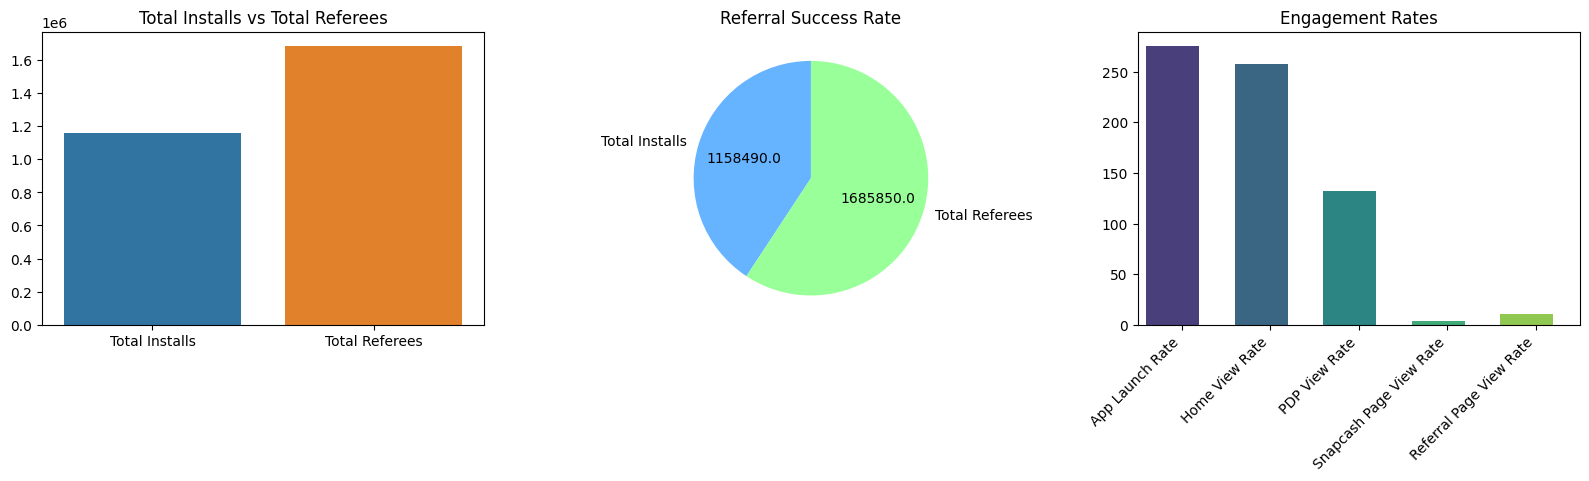

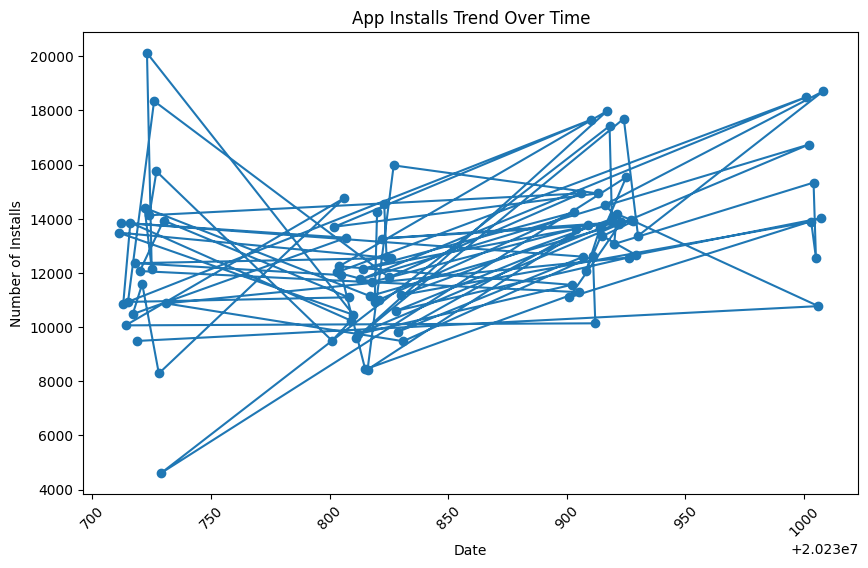

In [ ]:
import matplotlib.pyplot as plt

# Plot app installs trend
plt.figure(figsize=(10, 6))
plt.plot(merged_df['dpYMD'], merged_df['Installs'], marker='o')
plt.title('App Installs Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Installs')
plt.xticks(rotation=45)
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfysfzgxd/lgp320a4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfysfzgxd/rg8qkp__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60835', 'data', 'file=/tmp/tmpfysfzgxd/lgp320a4.json', 'init=/tmp/tmpfysfzgxd/rg8qkp__.json', 'output', 'file=/tmp/tmpfysfzgxd/prophet_modelzi79vz3y/prophet_model-20231220200754.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:07:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:07:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Total Installs: 1158490


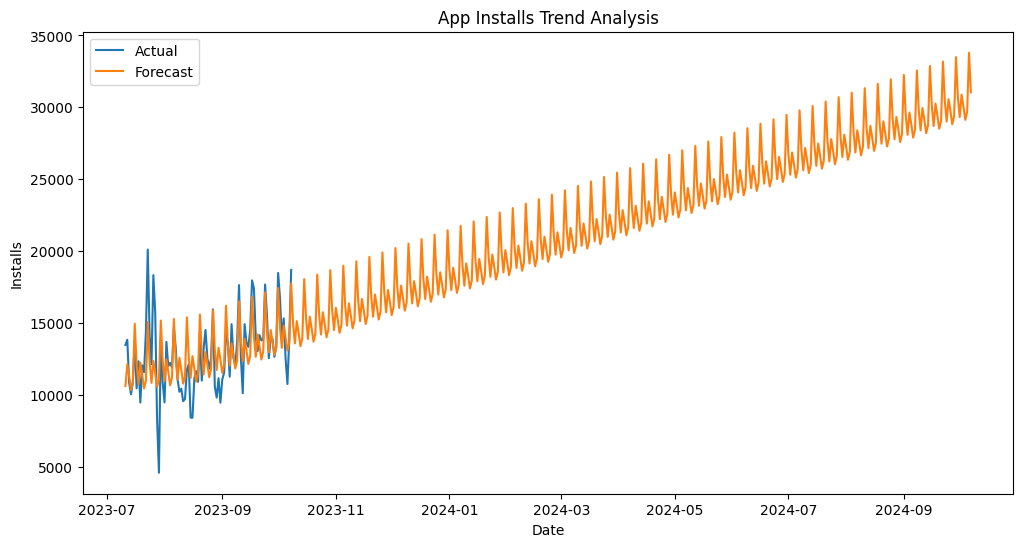

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Load data from Excel sheets
page_users_df = pd.read_excel(r"/content/Referral Case Study Data Points.xlsx", sheet_name="Different Page Users")
referral_numbers_df = pd.read_excel(r"/content/Referral Case Study Data Points.xlsx", sheet_name="Referral Number")

# Merge dataframes on 'dpYMD'
merged_df = pd.merge(page_users_df, referral_numbers_df, on="dpYMD")

# Calculate overall metrics
total_installs = merged_df['Installs'].sum()

# Create a dataframe for Prophet model
prophet_df = merged_df[['dpYMD', 'Installs']].rename(columns={'dpYMD': 'ds', 'Installs': 'y'})

# Convert 'ds' to datetime format
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y%m%d')

# Instantiate the Prophet model
model = Prophet()

# Fit the model
model.fit(prophet_df)

# Create a future dataframe
future = model.make_future_dataframe(periods=365)  # Extend the dataframe for future predictions

# Generate predictions
forecast = model.predict(future)

# Display overview metrics
print(f"Total Installs: {total_installs}")

# Plotting the trends
fig, ax = plt.subplots(figsize=(12, 6))

# Original data
sns.lineplot(x='ds', y='y', data=prophet_df, label='Actual', ax=ax)

# Forecasted data
sns.lineplot(x='ds', y='yhat', data=forecast, label='Forecast', ax=ax)

plt.title('App Installs Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Installs')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

   Cluster  Referees  Installs
0        0    127445     83235
1        1    186800    133365
2        2    361445    249640
3        3    196380    127350
4        4    218970    148925
5        5    282170    193300
6        6    163500    115885
7        7     27590     18970
8        8     67045     49610
9        9     54505     38210


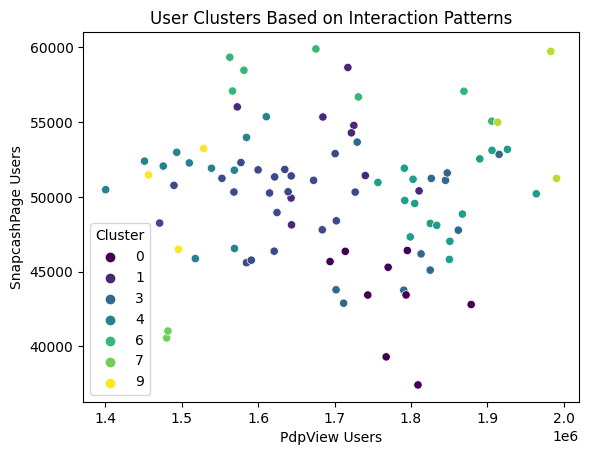

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load data from Excel sheets
page_users_df = pd.read_excel("/content/Referral Case Study Data Points.xlsx", sheet_name="Different Page Users")
referral_numbers_df = pd.read_excel("/content/Referral Case Study Data Points.xlsx", sheet_name="Referral Number")

# Merge dataframes on 'dpYMD'
merged_df = pd.merge(page_users_df, referral_numbers_df, on="dpYMD")

# Select relevant features for clustering
features = ['AppLaunchUsers', 'HomeViewUsers', 'PdpViewUsers', 'snapcashPageUsers', 'referralPageViewUsers']

# Standardize features
scaler = StandardScaler()
merged_df_scaled = scaler.fit_transform(merged_df[features])

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(merged_df_scaled)
    silhouette_avg = silhouette_score(merged_df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 because the range starts from 2

# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(merged_df_scaled)

# Analyze referral success metrics within each user cluster
cluster_metrics = merged_df.groupby('Cluster').agg({
    'Referees': 'sum',
    'Installs': 'sum'
}).reset_index()

# Display the cluster metrics
print(cluster_metrics)

# Visualize the clusters
sns.scatterplot(x='PdpViewUsers', y='snapcashPageUsers', hue='Cluster', data=merged_df, palette='viridis')
plt.title('User Clusters Based on Interaction Patterns')
plt.xlabel('PdpView Users')
plt.ylabel('SnapcashPage Users')
plt.sho

<ipython-input-13-1ecb8938664e>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=page_rates_df, ci=None, palette='viridis')


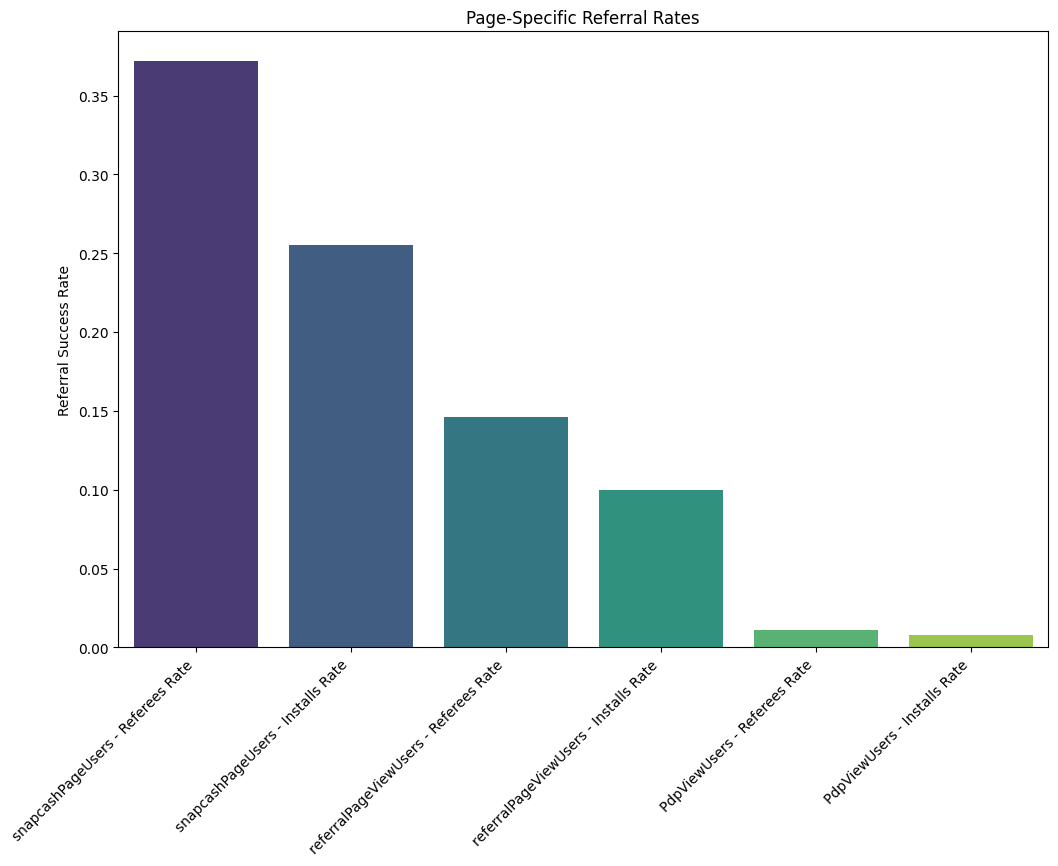

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from Excel sheets
page_users_df = pd.read_excel("/content/Referral Case Study Data Points.xlsx", sheet_name="Different Page Users")
referral_numbers_df = pd.read_excel("/content/Referral Case Study Data Points.xlsx", sheet_name="Referral Number")

# Merge dataframes on 'dpYMD'
merged_df = pd.merge(page_users_df, referral_numbers_df, on="dpYMD")

# Corrected column names
page_columns = ['SnapcashPage Usersw', 'ReferralPageView Users', 'PdpViewUsers']
referral_columns = ['Referees', 'Installs']

# Calculate page-specific referral rates
page_rates_df = pd.DataFrame()
for page_column in page_columns:
    for referral_column in referral_columns:
        page_rates_df[f'{page_column} - {referral_column} Rate'] = merged_df[referral_column] / merged_df[page_column]

# Visualize page-specific referral rates
plt.figure(figsize=(12, 8))
sns.barplot(data=page_rates_df, ci=None, palette='viridis')
plt.title('Page-Specific Referral Rates')
plt.ylabel('Referral Success Rate')
plt.xticks(rotation=45, ha='right')
plt.show()


BAU Page-Specific Referral Rates:
snapcashPageUsers: 36.48%
referralPageViewUsers: 14.15%
PdpViewUsers: 1.06%

Sale Page-Specific Referral Rates:
snapcashPageUsers: 38.78%
referralPageViewUsers: 14.46%
PdpViewUsers: 1.17%


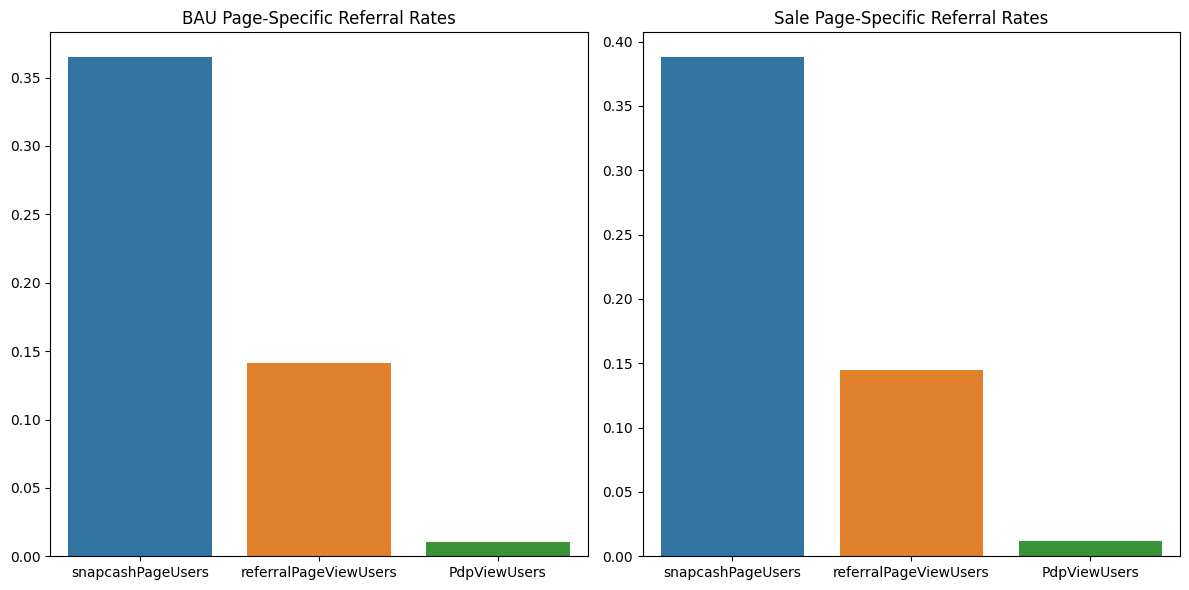

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from Excel sheets
page_users_df = pd.read_excel(r"/content/Referral Case Study Data Points.xlsx", sheet_name="Different Page Users")
referral_numbers_df = pd.read_excel(r"/content/Referral Case Study Data Points.xlsx", sheet_name="Referral Number")
day_type_df = pd.read_excel(r"/content/Referral Case Study Data Points.xlsx", sheet_name="Day Type")

# Merge dataframes on 'dpYMD'
merged_df = pd.merge(page_users_df, referral_numbers_df, on="dpYMD")
merged_df = pd.merge(merged_df, day_type_df, on="dpYMD")

# Assuming df contains the dataframe with the provided data
# Replace 'df' with your actual dataframe name
df = merged_df

# Filter data for BAU and Sale days
bau_data = df[df['dayType'] == 'BAU']
sale_data = df[df['dayType'] == 'SALE']

# List of page columns for analysis
page_columns = ['snapcashPageUsers', 'referralPageViewUsers', 'PdpViewUsers']

# Calculate page-specific referral rates for BAU
bau_referral_rates = {}
for page_column in page_columns:
    total_installs_bau = bau_data['Installs'].sum()
    total_referees_bau = bau_data['Referees'].sum()
    total_page_users_bau = bau_data[page_column].sum()

    referral_rate_bau = total_referees_bau / total_page_users_bau
    bau_referral_rates[page_column] = referral_rate_bau

# Calculate page-specific referral rates for Sale
sale_referral_rates = {}
for page_column in page_columns:
    total_installs_sale = sale_data['Installs'].sum()
    total_referees_sale = sale_data['Referees'].sum()
    total_page_users_sale = sale_data[page_column].sum()

    referral_rate_sale = total_referees_sale / total_page_users_sale
    sale_referral_rates[page_column] = referral_rate_sale

# Display results
print("BAU Page-Specific Referral Rates:")
for page, rate in bau_referral_rates.items():
    print(f"{page}: {rate:.2%}")

print("\nSale Page-Specific Referral Rates:")
for page, rate in sale_referral_rates.items():
    print(f"{page}: {rate:.2%}")

# Visualize the results
plt.figure(figsize=(12, 6))

# Bar plot for BAU Page-Specific Referral Rates
plt.subplot(1, 2, 1)
sns.barplot(x=list(bau_referral_rates.keys()), y=list(bau_referral_rates.values()))
plt.title('BAU Page-Specific Referral Rates')

# Bar plot for Sale Page-Specific Referral Rates
plt.subplot(1, 2, 2)
sns.barplot(x=list(sale_referral_rates.keys()), y=list(sale_referral_rates.values()))
plt.title('Sale Page-Specific Referral Rates')

plt.tight_layout()
plt.show()


BAU Results:
Total Clicks: 1426905

SALE Results:
Total Clicks: 873770


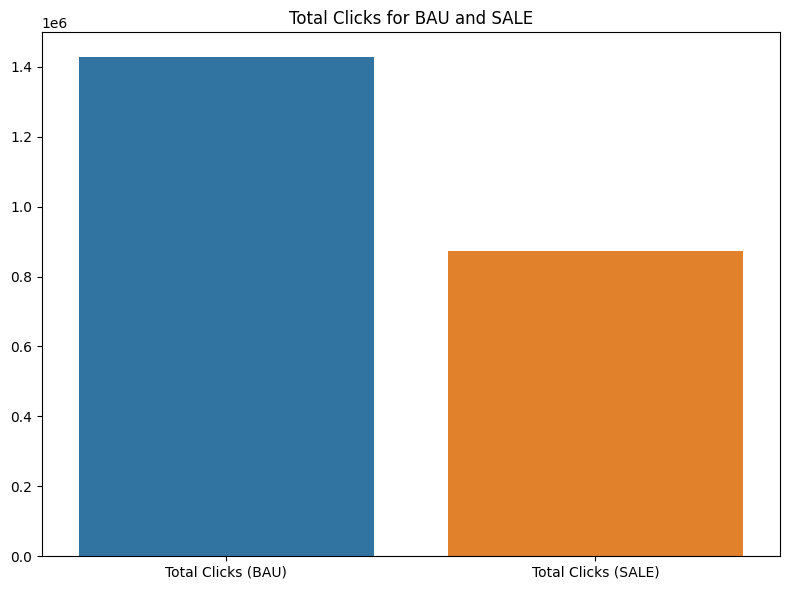

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from Excel sheets
page_users_df = pd.read_excel(r"/content/Referral Case Study Data Points.xlsx", sheet_name="Different Page Users")
referral_numbers_df = pd.read_excel(r"/content/Referral Case Study Data Points.xlsx", sheet_name="Referral Number")
day_type_df = pd.read_excel(r"/content/Referral Case Study Data Points.xlsx", sheet_name="Day Type")

# Merge dataframes on 'dpYMD'
merged_df = pd.merge(page_users_df, referral_numbers_df, on="dpYMD")
merged_df = pd.merge(merged_df, day_type_df, on="dpYMD")

# Assuming df contains the dataframe with the provided data
# Replace 'df' with your actual dataframe name
df = merged_df

# Filter data for BAU and SALE days
bau_data = df[df['dayType'] == 'BAU']
sale_data = df[df['dayType'] == 'SALE']

# Explore the influence of referral bulk notifications for BAU
total_clicks_bau = bau_data['Referral Bulk Notification\nClickUsers'].sum()

# Explore the influence of referral bulk notifications for SALE
total_clicks_sale = sale_data['Referral Bulk Notification\nClickUsers'].sum()

# Display results for BAU
print("BAU Results:")
print(f"Total Clicks: {total_clicks_bau}")

# Display results for SALE
print("\nSALE Results:")
print(f"Total Clicks: {total_clicks_sale}")

# Visualize the results
plt.figure(figsize=(8, 6))

# Bar plot for total clicks for BAU and SALE
sns.barplot(x=['Total Clicks (BAU)', 'Total Clicks (SALE)'], y=[total_clicks_bau, total_clicks_sale])
plt.title('Total Clicks for BAU and SALE')

plt.tight_layout()
plt.show()
